In [ ]:
!pip install transformers
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/Lyrics-Total - lyrics_total.csv', index_col=[0])
df.head()

,id,track,artist,lyrics,language,lyrics_translated
0,3pCt2wRdBDa2kCisIdHWgF,To the Bone,Pamungkas,Have I ever told you \n I want you to the bone...,en,Have I ever told you \n I want you to the bone...
1,6Hii26x3qDErVitnGW8QtO,Runtuh,Feby Putri,Ku terbangun lagi \n Di antara sepi \n Hanya p...,id,I woke up again\n Between lonely\n Only a crow...
2,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,Tulus,"Perjalanan membawamu \n Bertemu denganku, ku b...",id,"The journey takes you\n Meet me, I met you\n L..."
3,630DpnzdfjdVqv2yLfPbAX,Bertaut,Nadin Amizah,"Bun, hidup berjalan seperti bajingan \n ♪ \n S...",id,"Bun, life goes like a bastard\n ♪\n Like hedge..."
4,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,Lembaran foto hitam-putih \n Aku coba ingat la...,id,Black and White Photo Sheet\n I tried to remem...


In [ ]:
df['numCharts'] = range(1, len(df) + 1)

# Langkah 1: VADER Sentiment Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['lyrics_translated']
  myid = row['numCharts']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/4157 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'numCharts'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,numCharts,neg,neu,pos,compound,id,track,artist,lyrics,language,lyrics_translated
0,1,0.072,0.728,0.200,0.9950,3pCt2wRdBDa2kCisIdHWgF,To the Bone,Pamungkas,Have I ever told you \n I want you to the bone...,en,Have I ever told you \n I want you to the bone...
1,2,0.292,0.500,0.208,-0.9456,6Hii26x3qDErVitnGW8QtO,Runtuh,Feby Putri,Ku terbangun lagi \n Di antara sepi \n Hanya p...,id,I woke up again\n Between lonely\n Only a crow...
2,3,0.109,0.780,0.111,0.3449,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,Tulus,"Perjalanan membawamu \n Bertemu denganku, ku b...",id,"The journey takes you\n Meet me, I met you\n L..."
3,4,0.123,0.712,0.165,0.8079,630DpnzdfjdVqv2yLfPbAX,Bertaut,Nadin Amizah,"Bun, hidup berjalan seperti bajingan \n ♪ \n S...",id,"Bun, life goes like a bastard\n ♪\n Like hedge..."
4,5,0.045,0.828,0.127,0.9324,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,Lembaran foto hitam-putih \n Aku coba ingat la...,id,Black and White Photo Sheet\n I tried to remem...


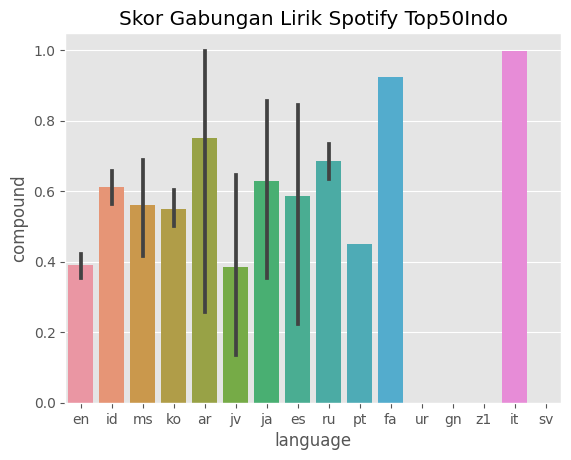

In [ ]:
# Hasil VADER
ax = sns.barplot(data=vaders, x='language', y='compound')
ax.set_title('Skor Gabungan Lirik Spotify Top50Indo')
plt.show()

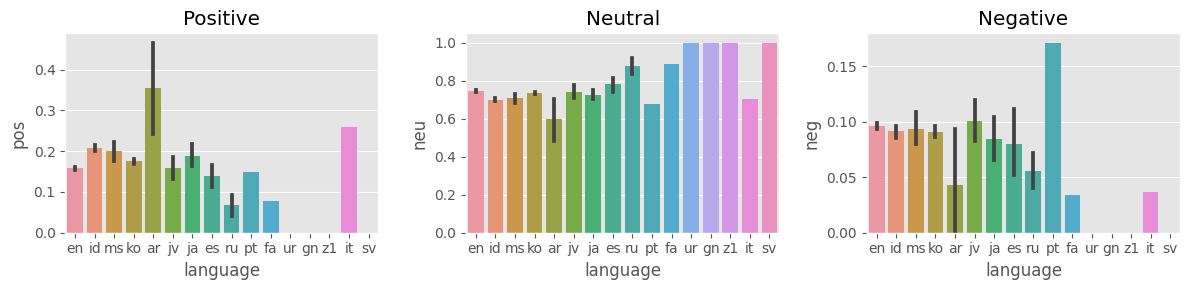

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='language', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='language', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='language', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
vaders.to_csv('lyrics_mood.csv')

# Langkah 2: Membuat Model Pretrained Roberta

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
df = pd.read_csv('/content/Lyrics-Total - lyrics_total.csv', index_col=[0])
df['numCharts'] = range(1, len(df) + 1)
df.head()

,id,track,artist,lyrics,language,lyrics_translated,numCharts
0,3pCt2wRdBDa2kCisIdHWgF,To the Bone,Pamungkas,Have I ever told you \n I want you to the bone...,en,Have I ever told you \n I want you to the bone...,1
1,6Hii26x3qDErVitnGW8QtO,Runtuh,Feby Putri,Ku terbangun lagi \n Di antara sepi \n Hanya p...,id,I woke up again\n Between lonely\n Only a crow...,2
2,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,Tulus,"Perjalanan membawamu \n Bertemu denganku, ku b...",id,"The journey takes you\n Meet me, I met you\n L...",3
3,630DpnzdfjdVqv2yLfPbAX,Bertaut,Nadin Amizah,"Bun, hidup berjalan seperti bajingan \n ♪ \n S...",id,"Bun, life goes like a bastard\n ♪\n Like hedge...",4
4,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,Lembaran foto hitam-putih \n Aku coba ingat la...,id,Black and White Photo Sheet\n I tried to remem...,5


In [ ]:
top_artists = ['Andmesh', 'Dewa 19', 'Fiersa Besari', 'Judika', 'Last Child', 'Mahalini', 'Noah', 'Pamungkas', 'Payung Teduh', 'Raisa', 'Rizky Febian', 'Rossa', 'Sheila On 7', 'Tiara Andini', 'Tulus', 'Virgoun']
df_top = df[df['artist'].isin(top_artists)]

In [ ]:
df_top.head()

,id,track,artist,lyrics,language,lyrics_translated,numCharts
0,3pCt2wRdBDa2kCisIdHWgF,To the Bone,Pamungkas,Have I ever told you \n I want you to the bone...,en,Have I ever told you \n I want you to the bone...,1
2,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,Tulus,"Perjalanan membawamu \n Bertemu denganku, ku b...",id,"The journey takes you\n Meet me, I met you\n L...",3
4,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,Lembaran foto hitam-putih \n Aku coba ingat la...,id,Black and White Photo Sheet\n I tried to remem...,5
5,6pmo9ha8iOPZc5lxPU9o8w,Sisa Rasa,Mahalini,"Ha-ah-ah-ah \n Melihatmu bahagia, satu hal yan...",id,"Ha-ah-ah-ah\n See you happy, one of the most b...",6
6,1mruWrUwAVe2XkksUQiaHK,Selamat (Selamat Tinggal),Virgoun,Di tempat ini \n Di tempat pertama aku menemuk...,id,In this place\n In the first place I found you...,7


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['lyrics_translated']
        myid = row['numCharts']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
df_top = df_top.reset_index()

In [ ]:
MAX_LENGTH = 512

res = {}
for i, row in tqdm(df_top.iterrows(), total=len(df_top)):
    try:
        text = row['lyrics_translated']
        myid = row['numCharts']

        # Cek panjang teks
        if len(text) > MAX_LENGTH:
            text = text[:MAX_LENGTH]  # Potong teks jika terlalu panjang

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/210 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'numCharts'})
results_df = results_df.merge(df_top, how='left')

In [ ]:
results_df.head()

,numCharts,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,id,track,artist,lyrics,language,lyrics_translated
0,1,0.030,0.872,0.098,0.3839,0.043134,0.554096,0.402770,0,3pCt2wRdBDa2kCisIdHWgF,To the Bone,Pamungkas,Have I ever told you \n I want you to the bone...,en,Have I ever told you \n I want you to the bone...
1,3,0.075,0.793,0.132,0.7231,0.073831,0.458538,0.467631,2,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,Tulus,"Perjalanan membawamu \n Bertemu denganku, ku b...",id,"The journey takes you\n Meet me, I met you\n L..."
2,5,0.025,0.851,0.124,0.8555,0.005404,0.139217,0.855379,4,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,Lembaran foto hitam-putih \n Aku coba ingat la...,id,Black and White Photo Sheet\n I tried to remem...
3,6,0.040,0.627,0.334,0.9876,0.012611,0.122486,0.864903,5,6pmo9ha8iOPZc5lxPU9o8w,Sisa Rasa,Mahalini,"Ha-ah-ah-ah \n Melihatmu bahagia, satu hal yan...",id,"Ha-ah-ah-ah\n See you happy, one of the most b..."
4,7,0.000,0.715,0.285,0.9886,0.005856,0.156451,0.837692,6,1mruWrUwAVe2XkksUQiaHK,Selamat (Selamat Tinggal),Virgoun,Di tempat ini \n Di tempat pertama aku menemuk...,id,In this place\n In the first place I found you...


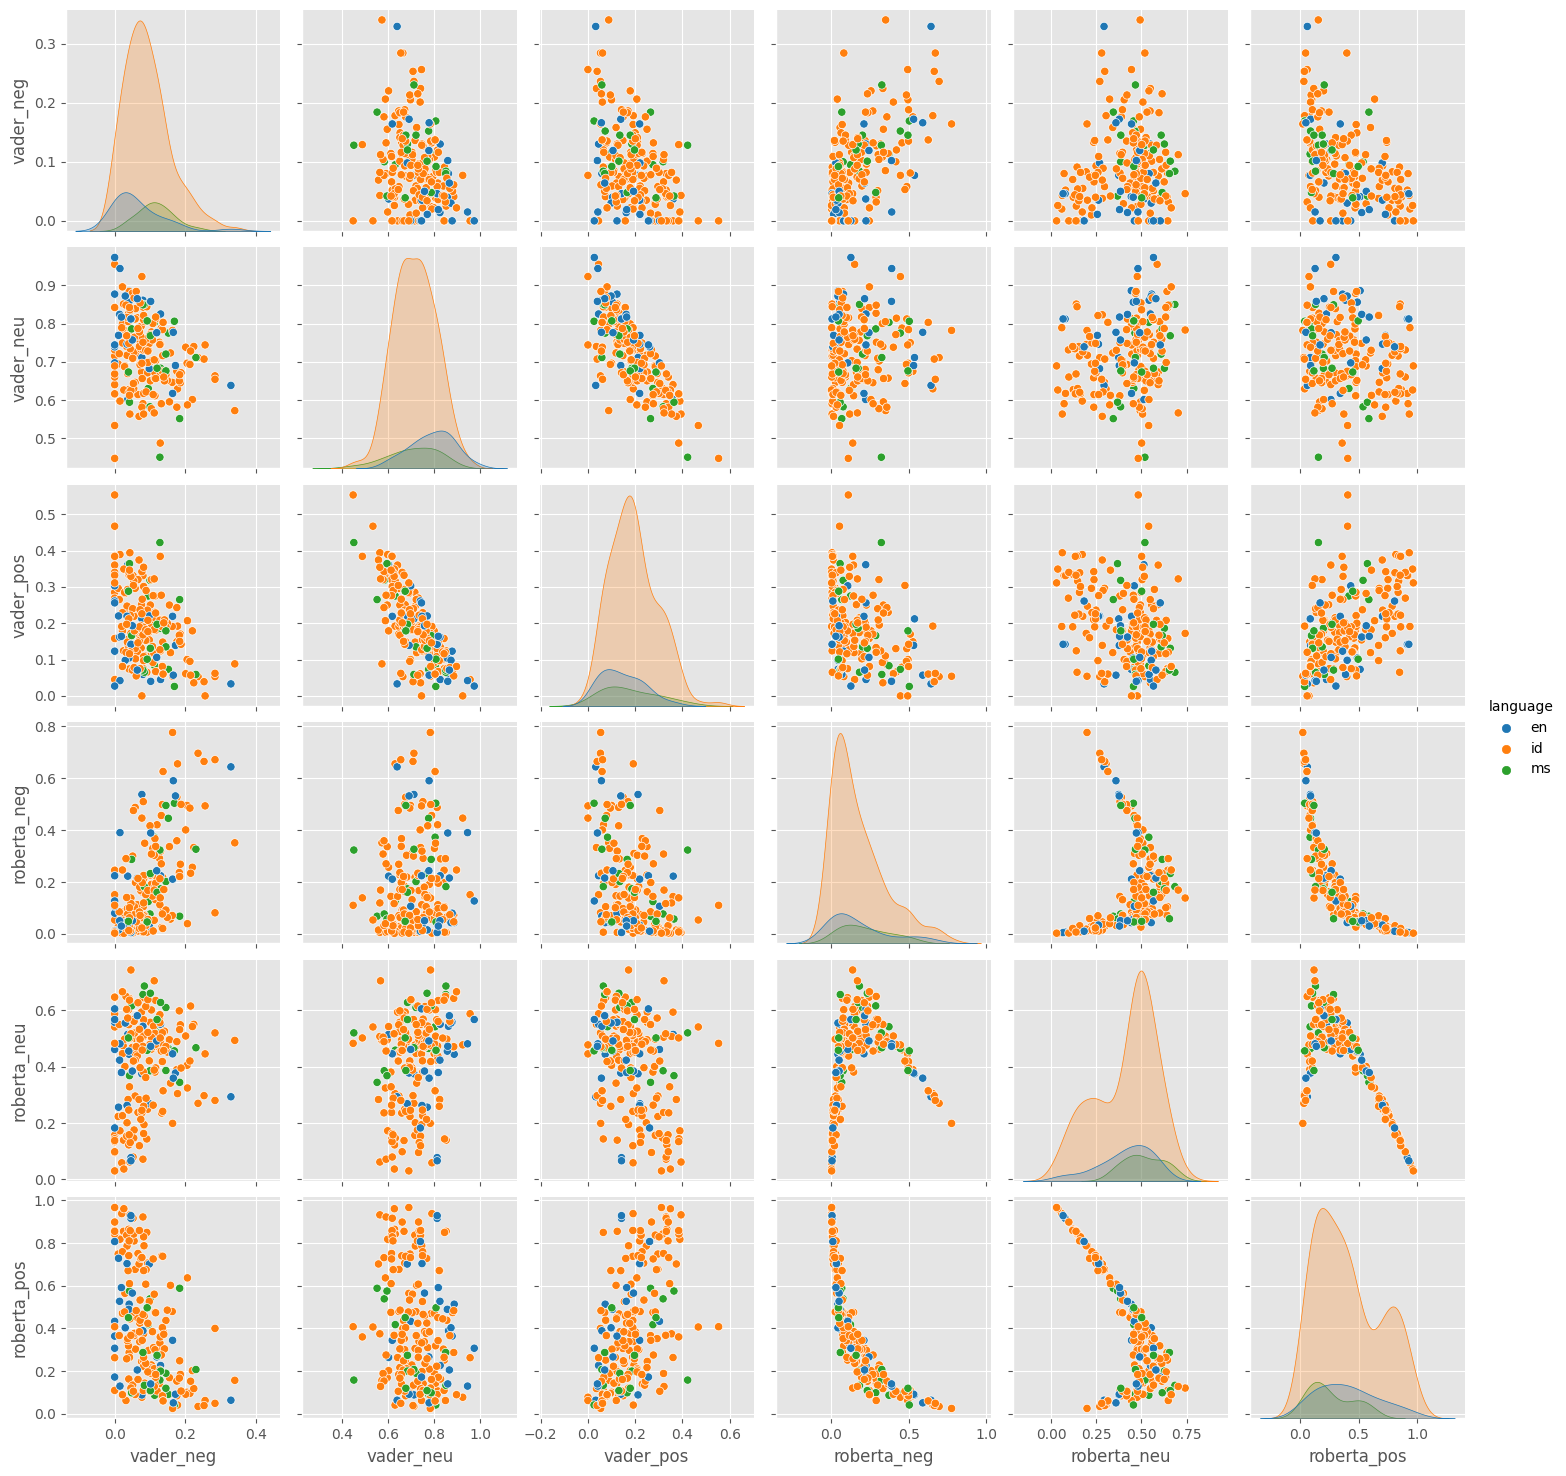

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='language',
            palette='tab10')
plt.show()

In [ ]:
results_df.to_csv('lyrics_top_mood.csv')

In [ ]:
MAX_LENGTH = 512

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['lyrics_translated']
        myid = row['numCharts']

        # Cek panjang teks
        if len(text) > MAX_LENGTH:
            text = text[:MAX_LENGTH]  # Potong teks jika terlalu panjang

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/4157 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (991 > 512). Running this sequence through the model will result in indexing errors


Broke for id 3262


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'numCharts'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

,numCharts,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,id,track,artist,lyrics,language,lyrics_translated
0,1,0.030,0.872,0.098,0.3839,0.043134,0.554096,0.402770,3pCt2wRdBDa2kCisIdHWgF,To the Bone,Pamungkas,Have I ever told you \n I want you to the bone...,en,Have I ever told you \n I want you to the bone...
1,2,0.325,0.577,0.098,-0.9781,0.494007,0.408583,0.097410,6Hii26x3qDErVitnGW8QtO,Runtuh,Feby Putri,Ku terbangun lagi \n Di antara sepi \n Hanya p...,id,I woke up again\n Between lonely\n Only a crow...
2,3,0.075,0.793,0.132,0.7231,0.073831,0.458538,0.467631,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,Tulus,"Perjalanan membawamu \n Bertemu denganku, ku b...",id,"The journey takes you\n Meet me, I met you\n L..."
3,4,0.131,0.676,0.193,0.7656,0.218969,0.566031,0.215000,630DpnzdfjdVqv2yLfPbAX,Bertaut,Nadin Amizah,"Bun, hidup berjalan seperti bajingan \n ♪ \n S...",id,"Bun, life goes like a bastard\n ♪\n Like hedge..."
4,5,0.025,0.851,0.124,0.8555,0.005404,0.139217,0.855379,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,Lembaran foto hitam-putih \n Aku coba ingat la...,id,Black and White Photo Sheet\n I tried to remem...


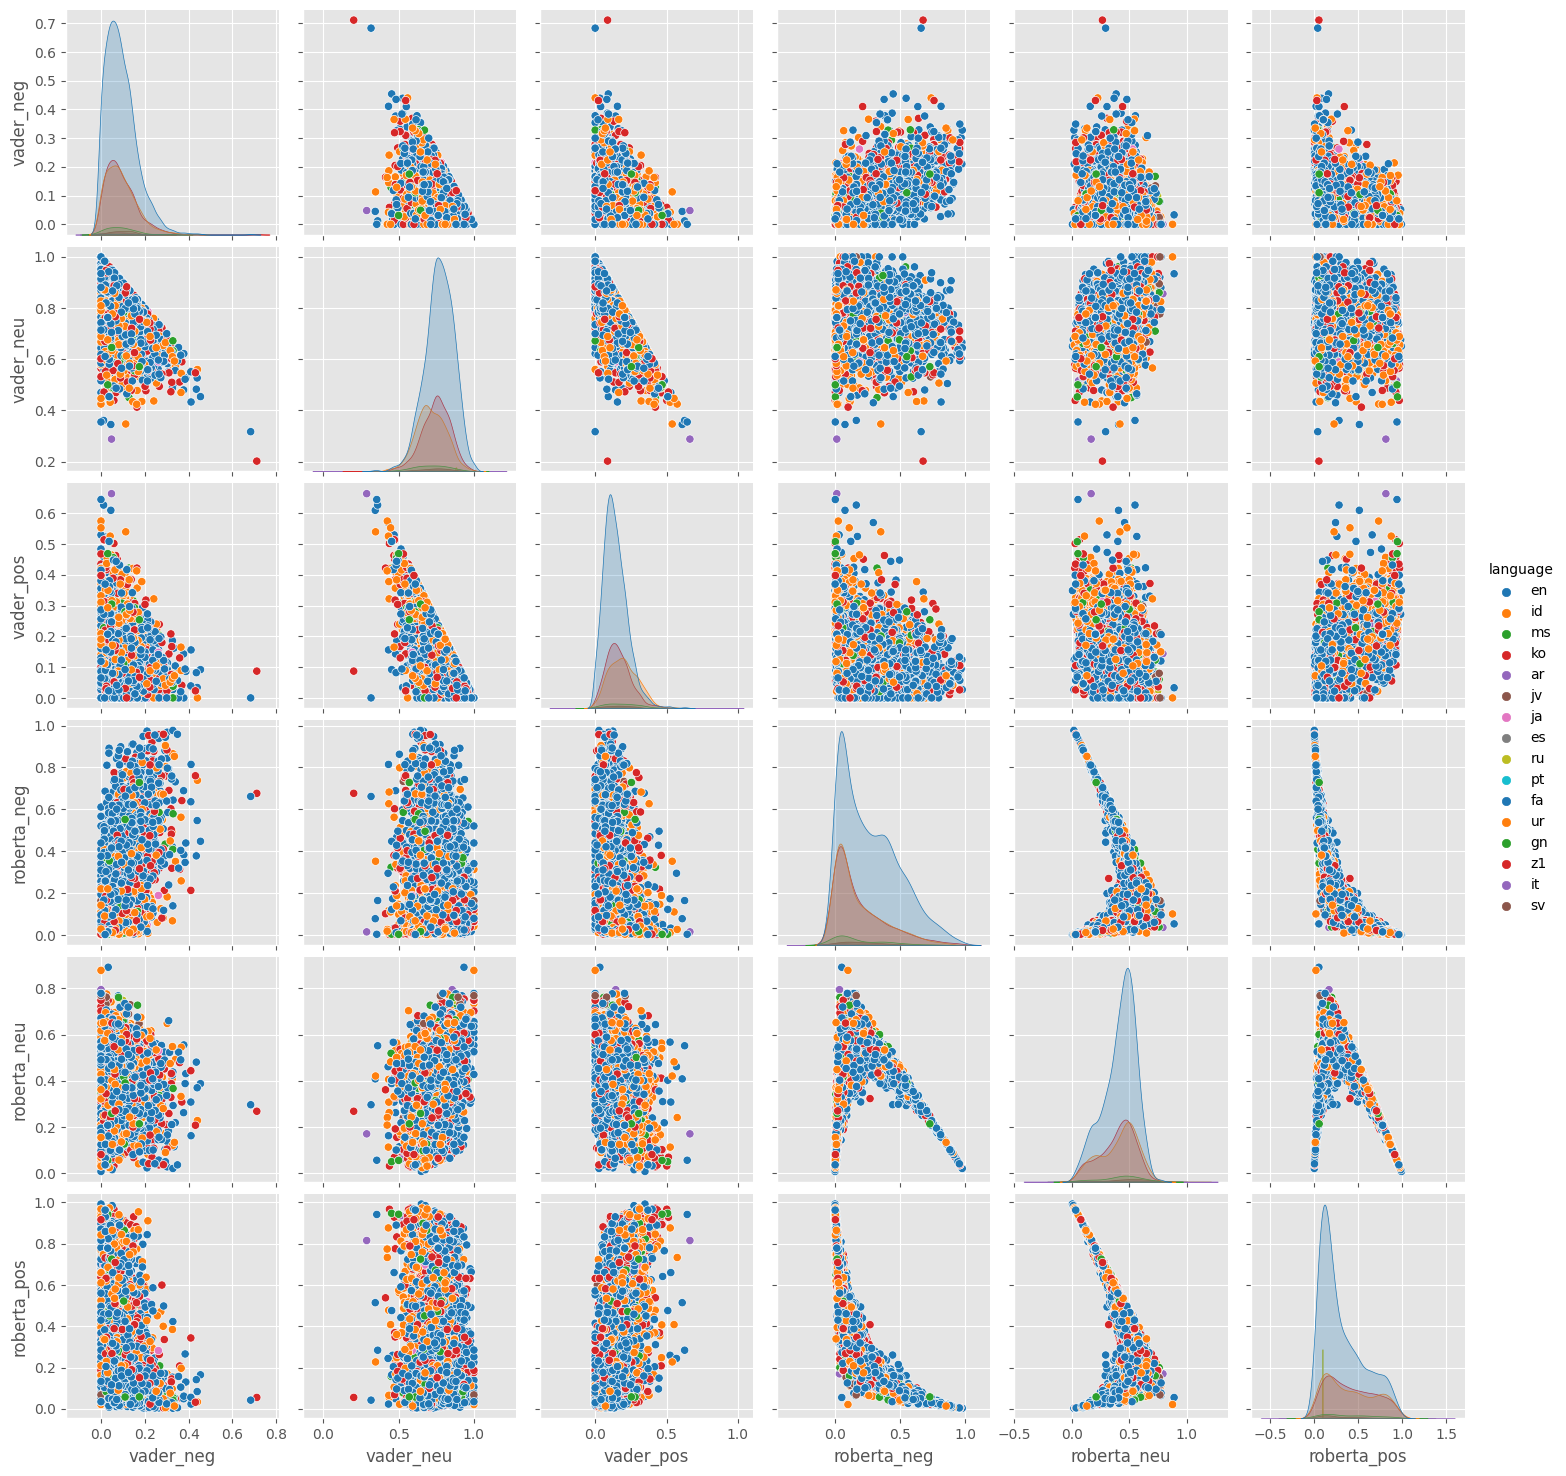

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='language',
            palette='tab10')
plt.show()

In [ ]:
results_df.to_csv('lyrics_mood.csv')